In [60]:
import pandas as pd
from sqlalchemy import create_engine

# Replace the following values with your actual database information
db_name = 'vehicle_data_db'
db_user = 'postgres'
db_pass = 'admin'
db_host = 'localhost'
db_port = '5432'  # default port for PostgreSQL

# Create the database engine
engine = create_engine(f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}')

sql_query = """
SELECT * FROM cleaned_vehicle_data
"""

df = pd.read_sql_query(sql_query, engine)

In [63]:
# Step 1: Filter out NaNs and zeros
filtered_df = df[pd.notna(df['CarPrice']) & pd.notna(df['CarMileage']) & (df['CarMileage'] != 0) & (df['CarPrice'] != 0)]

# Step 2: Clamp outliers for CarPrice and CarMileage
# Define the IQR range for clamping
Q1 = filtered_df.quantile(0.25)
Q3 = filtered_df.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for clamping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clamp the values
filtered_df['CarPrice'] = filtered_df['CarPrice'].clip(lower_bound['CarPrice'], upper_bound['CarPrice'])
filtered_df['CarMileage'] = filtered_df['CarMileage'].clip(lower_bound['CarMileage'], upper_bound['CarMileage'])

C:\Users\Dalton\AppData\Local\Temp\ipykernel_22456\3626081013.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = filtered_df.quantile(0.25)
C:\Users\Dalton\AppData\Local\Temp\ipykernel_22456\3626081013.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = filtered_df.quantile(0.75)
C:\Users\Dalton\AppData\Local\Temp\ipykernel_22456\3626081013.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


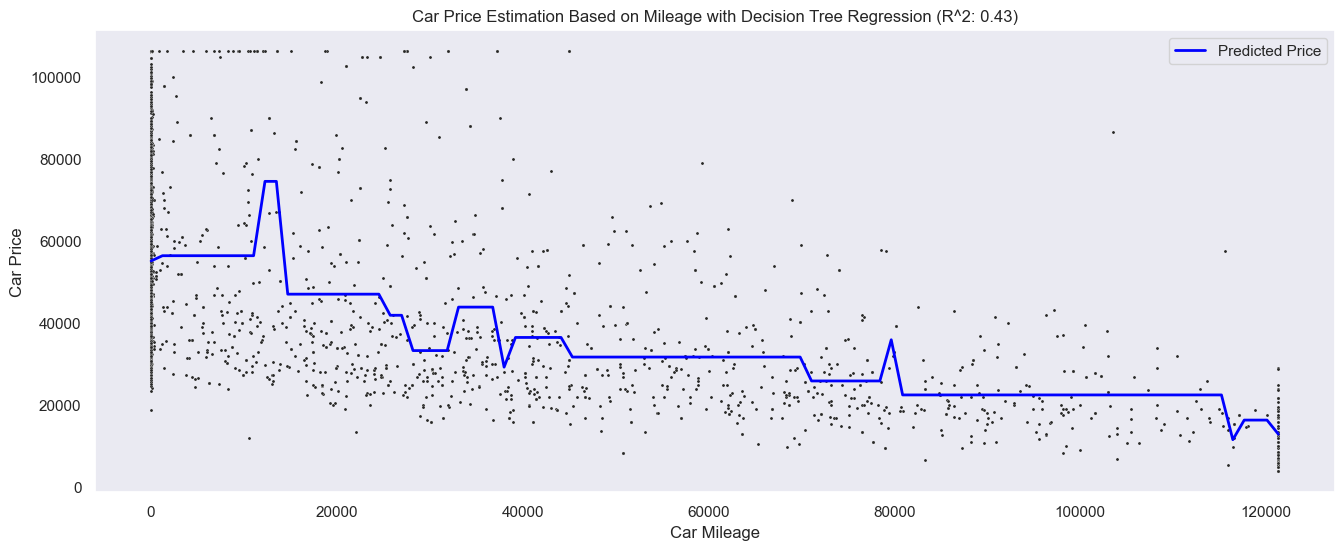

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Assuming filtered_df is already defined and cleaned
X = filtered_df[['CarMileage']]  # Predictor variable
y = filtered_df['CarPrice']      # Response variable

# Fit the Decision Tree Regression Model
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X, y)

# Calculate R^2 value
r2 = tree_model.score(X, y)

# Generate Predictions for Plotting
mileage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_price = tree_model.predict(mileage_range)

# Plot the Scatterplot and Prediction Line
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(data=filtered_df, x='CarMileage', y='CarPrice', s=5, color=".15")
plt.plot(mileage_range.flatten(), predicted_price, color='blue', linewidth=2, label='Predicted Price')
plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title(f'Car Price Estimation Based on Mileage with Decision Tree Regression (R^2: {r2:.2f})')
plt.legend()
plt.show()

In [45]:
# Group by 'Year' and calculate the mean and count of 'CarPrice'
stats_per_year = filtered_df.groupby('Year')['CarPrice'].agg(['mean', 'count'])
stats_per_year = stats_per_year.reset_index()

In [46]:
# Convert 'Year' column to integer
stats_per_year['Year'] = stats_per_year['Year'].astype(int)
stats_per_year['mean'] = stats_per_year['mean'].astype(int)

# Now filter the DataFrame
lineplotdata = stats_per_year[stats_per_year['Year'] > 2013]

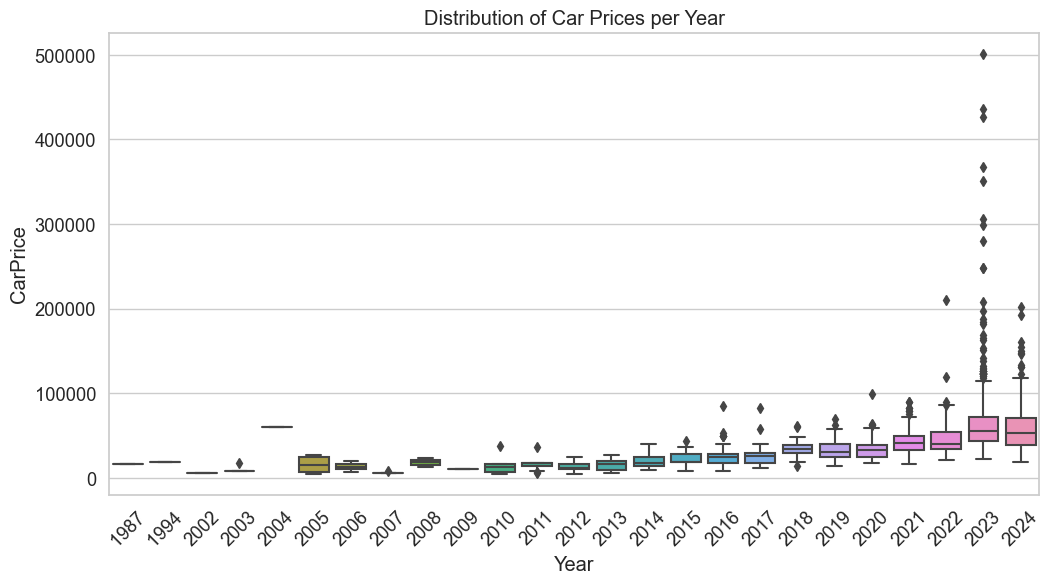

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting boxplots for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='CarPrice', data=filtered_df, order=sorted(filtered_df['Year'].unique()))
plt.xticks(rotation=45)
plt.title("Distribution of Car Prices per Year")
plt.show()

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

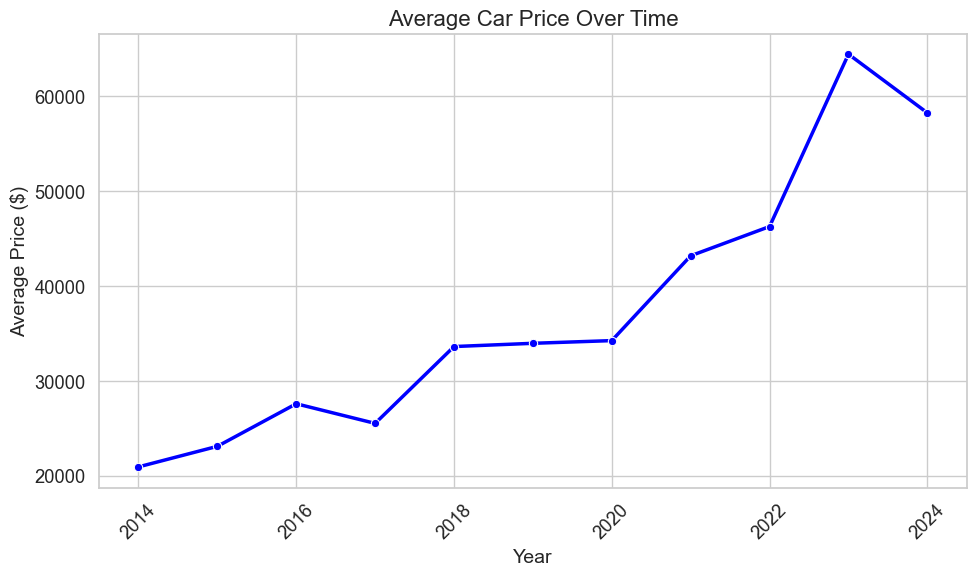

In [49]:
sns.set(style="whitegrid", palette="mako", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='mean', data=lineplotdata, marker='o', color='b', linewidth=2.5)
plt.title('Average Car Price Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

In [52]:
models = filtered_df['Model'].value_counts()

In [53]:
F150 = filtered_df[filtered_df['Model'] == 'F-150']

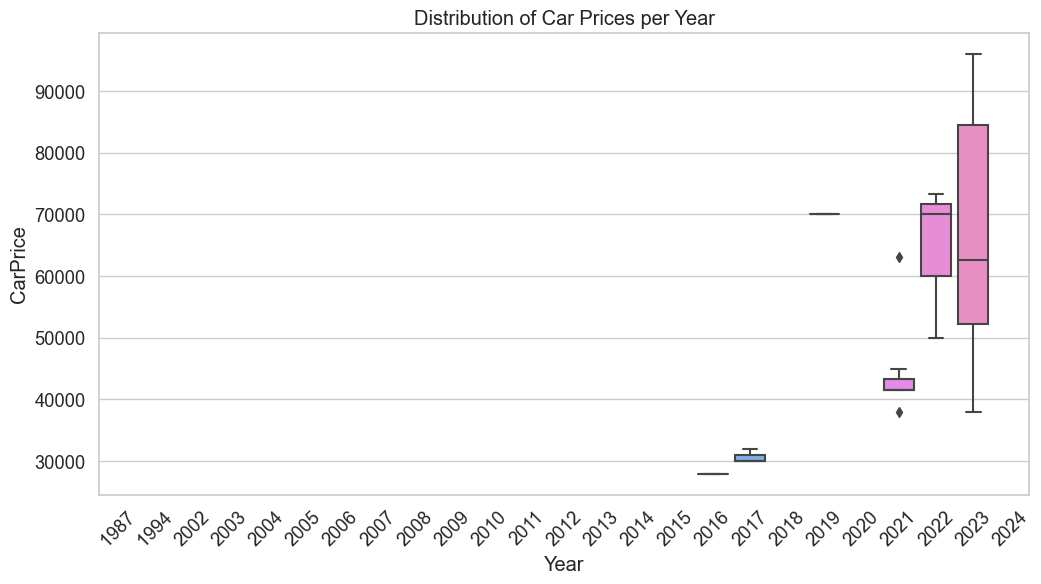

In [54]:
# Plotting boxplots for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='CarPrice', data=F150, order=sorted(filtered_df['Year'].unique()))
plt.xticks(rotation=45)
plt.title("Distribution of Car Prices per Year")
plt.show()